170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/20
391/391 [==============================] - 15s 36ms/step - loss: 0.0349 - val_loss: 0.0270
Epoch 2/20
391/391 [==============================] - 13s 34ms/step - loss: 0.0242 - val_loss: 0.0229
Epoch 3/20
391/391 [==============================] - 13s 34ms/step - loss: 0.0203 - val_loss: 0.0187
Epoch 4/20
391/391 [==============================] - 14s 36ms/step - loss: 0.0180 - val_loss: 0.0181
Epoch 5/20
391/391 [==============================] - 13s 33ms/step - loss: 0.0166 - val_loss: 0.0166
Epoch 6/20
391/391 [==============================] - 13s 33ms/step - loss: 0.0159 - val_loss: 0.0155
Epoch 7/20
391/391 [==============================] - 15s 39ms/step - loss: 0.0156 - val_loss: 0.0154
Epoch 8/20
391/391 [==============================] - 13s 32ms/step - loss: 0.0153 - val_loss: 0.0152
Epoch 9/20
391/391 [==============================] - 13s 34ms/step - loss: 0.0150 - val_loss: 0.0148
Epoch 10/20
391

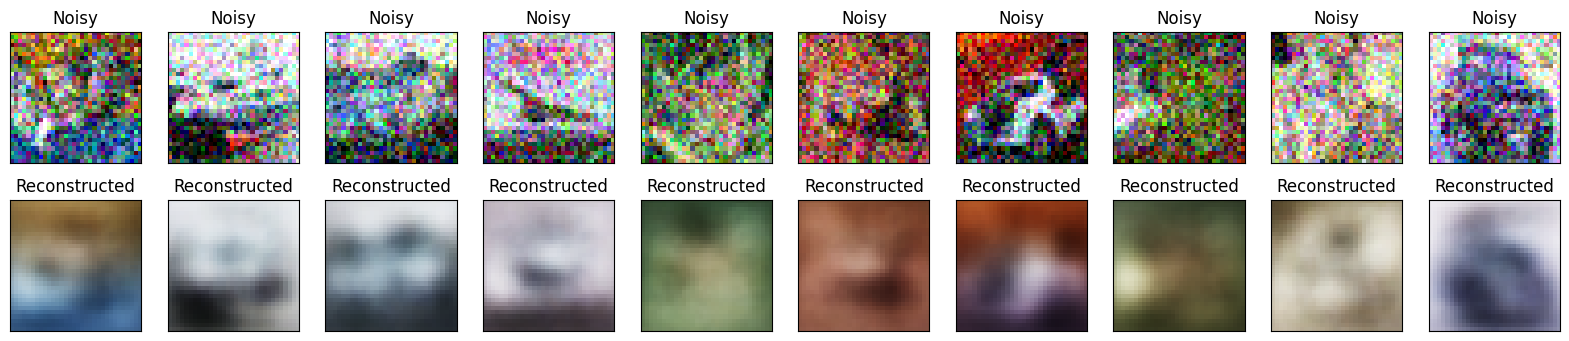

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Step 1: Dataset Preparation
(x_train, _), (x_test, _) = cifar10.load_data() # Loaded CIFAR-10 dataset
x_train = x_train.astype('float32') / 255.0 # Normalize pixel values to the range [0, 1]
x_test = x_test.astype('float32') / 255.0 # Normalize pixel values to the range [0, 1]
noise_factor = 0.2 # Introduce random noise to create noisy versions of the images
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.) # Clip the pixel values to ensure they remain in the range [0, 1]
x_test_noisy = np.clip(x_test_noisy, 0., 1.) # Clip the pixel values to ensure they remain in the range [0, 1]

# Step 2: Model Architecture
input_shape = x_train.shape[1:] # Define the autoencoder architecture
latent_dim = 128
input_img = Input(shape=input_shape)
flatten_img = Flatten()(input_img)
encoded = Dense(latent_dim, activation='relu')(flatten_img)
decoded = Dense(np.prod(input_shape), activation='sigmoid')(encoded)
decoded_img = Reshape(input_shape)(decoded)
autoencoder = Model(input_img, decoded_img) # designed autoencoder

# Step 3: Model Training
autoencoder.compile(optimizer='adam', loss='mean_squared_error') # Compile the autoencoder model
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=20,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test)) # Train the model on noisy images

# Step 4: Model Evaluation
test_loss = autoencoder.evaluate(x_test_noisy, x_test) # Evaluate the trained model on test set
print("Test Loss Evaluation:", test_loss)
decoded_imgs = autoencoder.predict(x_test_noisy) # Visualize reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed clean images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
!pip install tensorflow



In [ ]:

# Discussion and Analysis:
# • Discuss the challenges encountered during model training and optimization, especially regarding sparsity constraints and denoising.
# • Analyze the quality of reconstructed images and the effectiveness of the autoencoder in removing noise and preserving image features.
# • Reflect on potential improvements or alternative approaches for enhancing reconstruction performance.


Challenges:
Sparsity Constraints: Balancing sparsity regularization to encourage efficient encoding without sacrificing reconstruction accuracy.
Denoising: Ensuring the model effectively removes noise while preserving essential image features.

Analysis:
Reconstructed Images: Assess quality visually and quantitatively using metrics like mean squared error and SSIM.
Effectiveness in Noise Removal: Evaluate visually and compare denoised images with clean originals.

Potential Improvements:
Architecture Modifications: Experiment with different architectures like deeper networks or convolutional layers.
Loss Function: Explore alternative loss functions better suited to denoising tasks.
Data Augmentation: Augment training data to improve generalization.
Regularization: Use techniques like dropout or batch normalization to prevent overfitting.

In [11]:
pip install tensorflow


Epoch 1/20
391/391 [==============================] - 16s 40ms/step - loss: 0.0345 - val_loss: 0.0258
Epoch 2/20
391/391 [==============================] - 16s 40ms/step - loss: 0.0233 - val_loss: 0.0210
Epoch 3/20
391/391 [==============================] - 14s 35ms/step - loss: 0.0193 - val_loss: 0.0184
Epoch 4/20
391/391 [==============================] - 14s 35ms/step - loss: 0.0170 - val_loss: 0.0161
Epoch 5/20
391/391 [==============================] - 13s 33ms/step - loss: 0.0159 - val_loss: 0.0151
Epoch 6/20
391/391 [==============================] - 13s 33ms/step - loss: 0.0149 - val_loss: 0.0147
Epoch 7/20
391/391 [==============================] - 14s 36ms/step - loss: 0.0146 - val_loss: 0.0160
Epoch 8/20
391/391 [==============================] - 14s 36ms/step - loss: 0.0143 - val_loss: 0.0142
Epoch 9/20
391/391 [==============================] - 13s 33ms/step - loss: 0.0142 - val_loss: 0.0146
Epoch 10/20
391/391 [==============================] - 13s 33ms/step - loss: 0.014

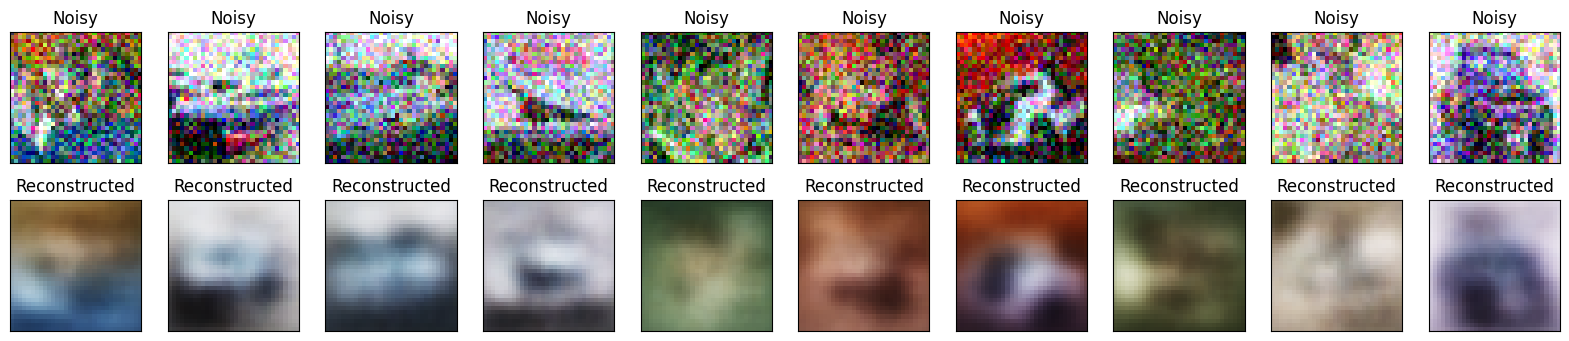

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import clone_model
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

class KerasRegressorWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, model, epochs=10, batch_size=32, patience=3):
        self.model = model
        self.epochs = epochs
        self.batch_size = batch_size
        self.patience = patience

    def fit(self, X, y):
        X = check_array(X)
        self.model_ = clone_model(self.model)
        self.model_.compile(optimizer='adam', loss='mean_squared_error')
        early_stopping = EarlyStopping(patience=self.patience, restore_best_weights=True)
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, callbacks=[early_stopping], verbose=0)
        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        return self.model_.predict(X)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Step 1: Dataset Preparation
(x_train, _), (x_test, _) = cifar10.load_data() # Loaded CIFAR-10 dataset
x_train = x_train.astype('float32') / 255.0 # Normalize pixel values to the range [0, 1]
x_test = x_test.astype('float32') / 255.0 # Normalize pixel values to the range [0, 1]
noise_factor = 0.2 # Introduce random noise to create noisy versions of the images
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.) # Clip the pixel values to ensure they remain in the range [0, 1]
x_test_noisy = np.clip(x_test_noisy, 0., 1.) # Clip the pixel values to ensure they remain in the range [0, 1]

# Step 2: Model Architecture
input_shape = x_train.shape[1:] # Define the autoencoder architecture
latent_dim = 128
input_img = Input(shape=input_shape)
flatten_img = Flatten()(input_img)
encoded = Dense(latent_dim, activation='relu')(flatten_img)
decoded = Dense(np.prod(input_shape), activation='sigmoid')(encoded)
decoded_img = Reshape(input_shape)(decoded)
autoencoder = Model(input_img, decoded_img) # designed autoencoder

# Step 3: Model Training
autoencoder.compile(optimizer='adam', loss='mean_squared_error') # Compile the autoencoder model
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=20,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test)) # Train the model on noisy images

# Step 4: Model Evaluation
test_loss = autoencoder.evaluate(x_test_noisy, x_test) # Evaluate the trained model on test set
print("Test Loss Evaluation:", test_loss)
decoded_imgs = autoencoder.predict(x_test_noisy) # Visualize reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed clean images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()